In [376]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [156]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cr245297\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [157]:
data = pd.read_excel('F:\\NLP\\Data without empty Y.xlsx')

In [1]:
data.shape

NameError: name 'data' is not defined

In [2]:
data.head()

NameError: name 'data' is not defined

In [160]:
#data['DIS'] = data['DIS'].str.lower()

In [3]:
data.head()

NameError: name 'data' is not defined

In [162]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('#', ' number ')
    q = q.replace('@', ' at ')
    
    

    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Remove stop words
    new_text = []
    
    for word in q.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    q = new_text[:]
    new_text.clear()
    return " ".join(q)
    
    

In [163]:
data['DIS'] = data['DIS'].apply(preprocess)

C:\Users\cr245297\AppData\Local\Temp\2\ipykernel_8212\3353498699.py:152: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [4]:
data.head()

NameError: name 'data' is not defined

In [5]:
with pd.option_context('display.max_colwidth', None):print(data['DIS'])

NameError: name 'pd' is not defined

In [166]:
data.isnull().sum()

DIS                     0
Tech Support Wording    0
dtype: int64

In [167]:
#data['DIS'].duplicated().sum()
data.duplicated().sum()

3

In [6]:
duplicates = data.duplicated()
print(data[duplicates])

NameError: name 'data' is not defined

In [169]:
data = data.drop_duplicates()

In [170]:
data.duplicated().sum()

0

In [171]:
data['DIS'].duplicated().sum()


0

In [172]:
duplicates_dis = data['DIS'].duplicated()
print(data[duplicates_dis])

Empty DataFrame
Columns: [DIS, Tech Support Wording]
Index: []


In [173]:
data['Tech Support Wording'].duplicated().sum()

44

In [174]:
def clean_spaces(data_toclean):
    words = data_toclean.split()
    clean_data = ' '.join(words)
    return clean_data

In [175]:
data['DIS'] = data['DIS'].apply(clean_spaces)

In [7]:
with pd.option_context('display.max_colwidth', None):print(data['DIS'])

NameError: name 'pd' is not defined

In [177]:
data.duplicated().sum()

1

In [8]:
duplicates = data.duplicated()
print(data[duplicates])

NameError: name 'data' is not defined

In [179]:
data = data.drop_duplicates()

In [180]:
data.duplicated().sum()

0

In [181]:
data['DIS'].duplicated().sum()

0

In [197]:
encoder = LabelEncoder()
data['Tech Support Wording'] = encoder.fit_transform(data['Tech Support Wording'])

In [199]:
print(data['Tech Support Wording'].value_counts())

Tech Support Wording
40    10
31     7
76     4
17     4
58     3
      ..
18     1
33     1
14     1
44     1
57     1
Name: count, Length: 86, dtype: int64


Text(0, 0.5, 'Count')

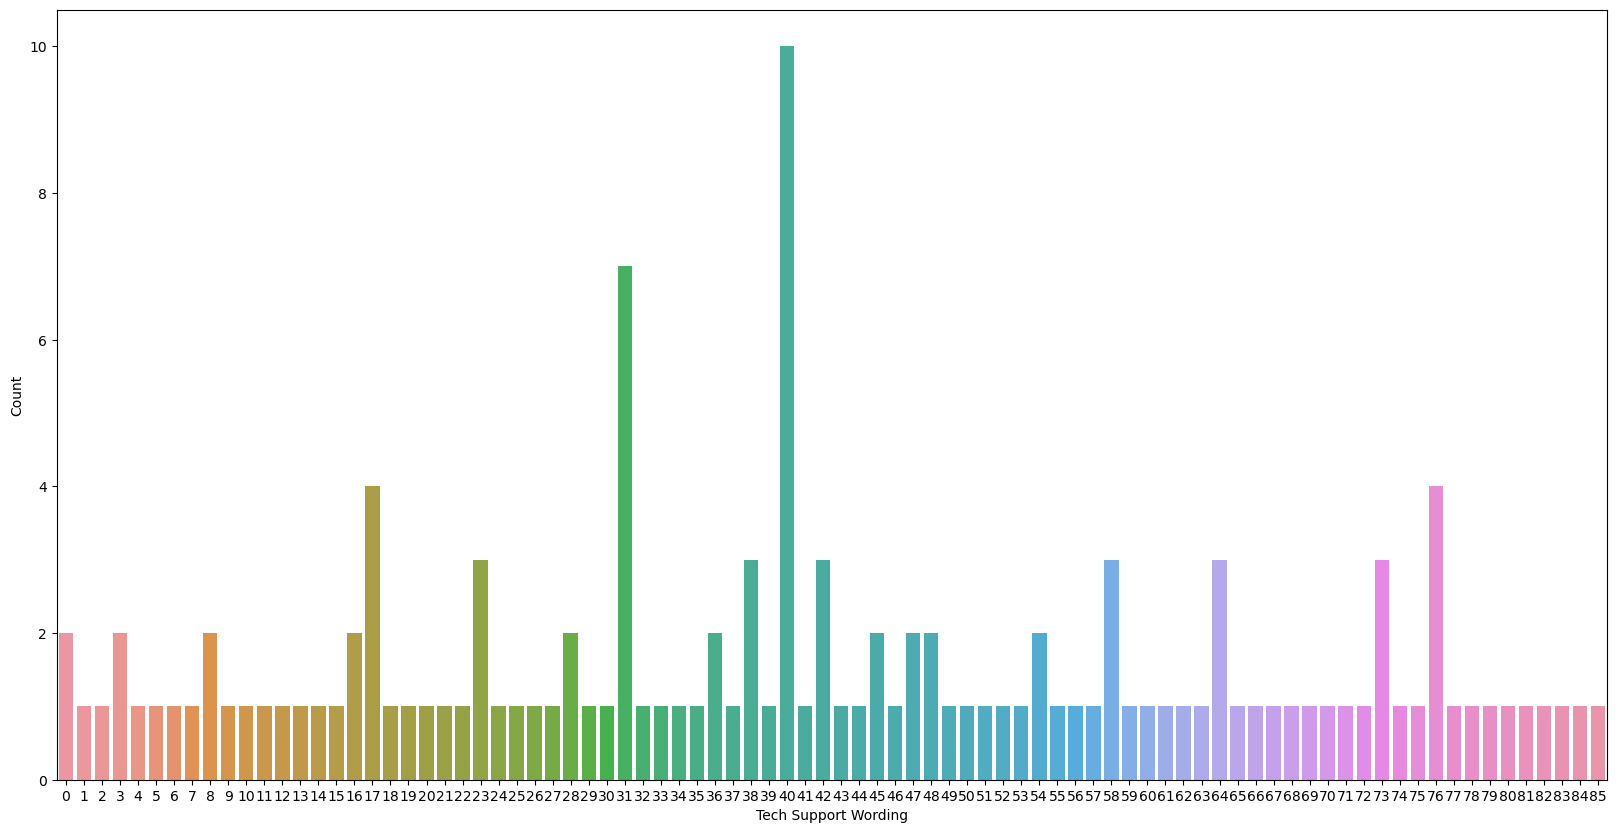

In [208]:
count = data['Tech Support Wording'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=count.index.values, y=count.values)

plt.xlabel("Tech Support Wording")
plt.ylabel("Count")

In [9]:
print(data['Tech Support Wording'].value_counts())

NameError: name 'data' is not defined

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
Data_vector = data['DIS']

cv = CountVectorizer
q1_arr = cv.fit_transform(Data_vector)

AttributeError: 'Series' object has no attribute '_validate_params'

In [222]:
#word tokenization 
import spacy
word_token = spacy.load('en_core_web_sm')

tokenized_texts =[]
for text in data['DIS']:
    doc = word_token(text)
    tokens = [token.text for token in doc]
    tokenized_texts.append(tokens)
    
#new column 
data['tokenized_text'] = tokenized_texts

In [10]:
print(data[['DIS','tokenized_text']])

NameError: name 'data' is not defined

In [219]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(data['tokenized_text'],data['Tech Support Wording'],test_size=0.2,random_state=1)

In [224]:
# Applying BoW
vectorizer = CountVectorizer()
# Transform the tokenized texts into a count matrix
X_train_vec = vectorizer.fit_transform(data['tokenized_text'].astype(str))
#X_test_vec = vectorizer.transform(X_test)

In [225]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_vec,data['Tech Support Wording'])
# y_pred1 = xgb.predict(X_test)
# accuracy_score(y_test,y_pred1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [379]:
y_pred = xgb.predict(X_train_vec)
accuracy_score(data['Tech Support Wording'],y_pred)

0.31007751937984496

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_vec,data['Tech Support Wording'])

In [377]:
y_pred = rf.predict(X_train_vec)
accuracy_score(data['Tech Support Wording'],y_pred)

1.0

In [390]:
user_input = input("Enter a few words: ")

Enter a few words: credit hold


In [391]:
doc = word_token(user_input)
tokens = [token.text for token in doc]
user_input_tokenized = ' '.join(tokens)
# Transform the user input using the pre-fitted CountVectorizer
user_input_vec = vectorizer.transform([user_input_tokenized])

In [392]:
prediction_xg = xgb.predict(user_input_vec)
print(f"Prediction xg: {prediction_xg[0]}")

Prediction xg: 58


In [393]:
prediction_rf = rf.predict(user_input_vec)
print(f"Prediction rf: {prediction_rf[0]}")

Prediction rf: 72


In [394]:
abc =data.iloc[-5]
print(abc)

DIS                        credit hold
Tech Support Wording                72
tokenized_text          [credit, hold]
Name: 128, dtype: object
